# Restructure the original tourism table and create the clean tourism table
This project is a replica of the project completed by me in my SAS training course, <a href='https://www.coursera.org/learn/sas-programming-certification-review'> Practical SAS Programming and Certification Review </a> on Coursera. The data used in this project and requirements of the project is borrowed from the above mentioned course. This project is an initiative to complete the same project in Python using Pandas library to demonstrate my skills in Data Cleaning and Data Preparation for conducting statistical analysis on the data.

Requirements and desired outcomes have been outline below:
The raw data for this case study is the Tourism data in 'tourism.xlsx' and 'country_info.xlsx' files. 

<b>Desired outcome</b>: 

The final table produced out of this task should be a combination of the cleaned_tourism table and the country_info table.

<b>Requirements</b>: 

<b>The first task is to create the cleaned_tourism table with the following column requirements</b>: 
* <b>Country_Name</b> – contains the country name from the original Country column.
* <b>Tourism_Type</b> – contains the type of tourism from the original Country column. Valid values are Inbound tourism or Outbound tourism. 
* <b>Category</b> – contains category names by extracting and modifying values from the original Country column. There should be six distinct values for Category as shown in the table below:

<table>
    <tr><th>Values in the Country Column</th><th>New Values for the Category Column</th></tr>
    <tr><td>Departures - Thousands</td><td>Departures</td></tr>
    <tr><td>Passenger transport - USD Mn</td><td>Passenger transport - USD</td></tr>
    <tr><td>Tourism expenditure in other countries - USD Mn</td><td>Tourism expenditure in other countries - USD</td></tr>
    <tr><td>Tourism expenditure in the country - USD Mn</td><td>Tourism expenditure in the country - USD</td></tr>
    <tr><td>Travel - USD Mn</td><td>Travel - USD</td></tr>
</table>

* <b>Series</b>– All values should be in uppercase and data that is not available (coded as "..") should be changed to a missing character value.
* <b>Y2014</b>– contains numeric values that are calculated from the scaled character values in the original _2014 year column. The scaled values are multiplied by either thousands or millions (abbreviated Mn), depending on the value listed for category in the Country column. The new Y2014 values should be formatted with the COMMA format.
<ul>
    <li>Example:  if the category is Travel - US$ MN and the value for _2014 is 4.26, then Y2014 is equal to 4.26 * 1000000, or 4,260,000.</li>
    <li>Include only Country_Name, Tourism_Type, Category, Series, and Y2014 in the output table.</li>
</ul>

<b>Thereafter merge the cleaned_tourism table with the country_info table and do the following</b>:

<ol>
<li>Create two new tables:</li>
<ul>
<li>final_tourism should contain only merged data.</li>
<li>nocountryfound should contain a list of distinct countries from the cleaned_tourism table that do not have a match in the country_info table.</li>
</ul>

<li>Create a format for the Continent column that labels continent IDs with the corresponding continent names. Permanently apply the format in the final_tourism table.</li>
<ul>
<li> 1 = North America</li>
<li> 2 = South America</li>
<li> 3 = Europe</li>
<li> 4 = Africa</li>
<li> 5 = Asia</li>
<li> 6 = Oceania</li>
<li> 7 = Antarctica</li>
</ul>
</ol>

In [1]:
import numpy as np
import pandas as pd

#### Load tourism data to a pandas dataframe

In [2]:
tour_data= pd.read_excel('tourism.xlsx')

In [3]:
tour_data.head(10)

,A,COUNTRY,Series,_1995,_1996,_1997,_1998,_1999,_2000,_2001,...,_2005,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014
0,4.0,AFGHANISTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Inbound tourism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Arrivals - Thousands,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,NaN,Tourism expenditure in the country - US$ Mn,IMF,..,..,..,..,..,..,..,...,..,..,..,45,87,167,147,168,154,91
4,NaN,Travel - US$ Mn,IMF,..,..,..,..,..,..,..,...,..,..,..,14,30,84,83,104,114,82
5,NaN,Passenger transport - US$ Mn,IMF,..,..,..,..,..,..,..,...,..,..,..,31,57,83,64,64,40,9
6,NaN,Outbound tourism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Departures - Thousands,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
8,NaN,Tourism expenditure in other countries - US$ Mn,IMF,..,..,..,..,..,..,..,...,..,..,..,34,61,103,269,103,141,122
9,NaN,Travel - US$ Mn,IMF,..,..,..,..,..,..,..,...,..,..,..,32,59,100,260,98,132,111


#### Drop years _1995 through _2013

In [4]:
tour_data.drop(['_1995', '_1996', '_1997','_1998','_1999','_2000','_2001','_2002','_2003','_2004','_2005','_2006','_2007','_2008','_2009','_2010','_2011','_2012','_2013'], axis=1, inplace=True)

In [5]:
tour_data.head()

,A,COUNTRY,Series,_2014
0,4.0,AFGHANISTAN,NaN,NaN
1,NaN,Inbound tourism,NaN,NaN
2,NaN,Arrivals - Thousands,..,..
3,NaN,Tourism expenditure in the country - US$ Mn,IMF,91
4,NaN,Travel - US$ Mn,IMF,82


#### Replace NaN values with 0

In [6]:
tour_data.fillna(0, inplace=True)

#### Count the NaN values remaining in each column

In [7]:
tour_data.isnull().sum()

A          0
COUNTRY    0
Series     0
_2014      0
dtype: int64

In [8]:
tour_data.head()

,A,COUNTRY,Series,_2014
0,4.0,AFGHANISTAN,0,0
1,0.0,Inbound tourism,0,0
2,0.0,Arrivals - Thousands,..,..
3,0.0,Tourism expenditure in the country - US$ Mn,IMF,91
4,0.0,Travel - US$ Mn,IMF,82


#### Requirement: cleaned_tourism table to have Country_Name column that contains the country name from the original Country column and retain the name of country for each row in the table

In [9]:
for i in range(len(tour_data)):
    if tour_data.loc[i,'A']!=0:
        tour_data.loc[i,'Country_name']=tour_data.loc[i,'COUNTRY']
    else:
        tour_data.loc[i,'Country_name']=tour_data.loc[i-1,'Country_name']    

In [10]:
tour_data.head()

,A,COUNTRY,Series,_2014,Country_name
0,4.0,AFGHANISTAN,0,0,AFGHANISTAN
1,0.0,Inbound tourism,0,0,AFGHANISTAN
2,0.0,Arrivals - Thousands,..,..,AFGHANISTAN
3,0.0,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN
4,0.0,Travel - US$ Mn,IMF,82,AFGHANISTAN


#### In rows when there's a value in the A column, that indicates a new country name in the country column. We now have country name in each row in country_name column. Hence, remove the rows that in the original Country column have country name, a value other than 0 in the A column indicates a country name in the country column.

In [11]:
for i in range(len(tour_data)):
    if tour_data.loc[i,'A']!=0:
        tour_data.drop(i, inplace=True)

In [12]:
tour_data.head(50)

,A,COUNTRY,Series,_2014,Country_name
1,0.0,Inbound tourism,0,0,AFGHANISTAN
2,0.0,Arrivals - Thousands,..,..,AFGHANISTAN
3,0.0,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN
4,0.0,Travel - US$ Mn,IMF,82,AFGHANISTAN
5,0.0,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN
6,0.0,Outbound tourism,0,0,AFGHANISTAN
7,0.0,Departures - Thousands,..,..,AFGHANISTAN
8,0.0,Tourism expenditure in other countries - US$ Mn,IMF,122,AFGHANISTAN
9,0.0,Travel - US$ Mn,IMF,111,AFGHANISTAN
10,0.0,Passenger transport - US$ Mn,IMF,11,AFGHANISTAN


#### Column A not needed any more, remove it, and resultig dataframe to be named new_tour.

In [13]:
new_tour=tour_data.drop('A', axis=1)

In [14]:
new_tour.head(12)

,COUNTRY,Series,_2014,Country_name
1,Inbound tourism,0,0,AFGHANISTAN
2,Arrivals - Thousands,..,..,AFGHANISTAN
3,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN
4,Travel - US$ Mn,IMF,82,AFGHANISTAN
5,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN
6,Outbound tourism,0,0,AFGHANISTAN
7,Departures - Thousands,..,..,AFGHANISTAN
8,Tourism expenditure in other countries - US$ Mn,IMF,122,AFGHANISTAN
9,Travel - US$ Mn,IMF,111,AFGHANISTAN
10,Passenger transport - US$ Mn,IMF,11,AFGHANISTAN


#### Some rows were dropped, index should be reset.

In [15]:
new_tour.reset_index(drop=True, inplace=True)

In [16]:
new_tour.head()

,COUNTRY,Series,_2014,Country_name
0,Inbound tourism,0,0,AFGHANISTAN
1,Arrivals - Thousands,..,..,AFGHANISTAN
2,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN
3,Travel - US$ Mn,IMF,82,AFGHANISTAN
4,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN


#### Requirement: Tourism_Type: Add new column Tourism_type, contains the type of tourism from the original Country column. Valid values are Inbound tourism or Outbound tourism.

In [17]:
for i in range(len(new_tour)):
    if new_tour.loc[i,'COUNTRY']=='Inbound tourism':
        new_tour.loc[i,'Tourism_type']=new_tour.loc[i,'COUNTRY']
    elif new_tour.loc[i,'COUNTRY']=='Outbound tourism':
        new_tour.loc[i,'Tourism_type']=new_tour.loc[i,'COUNTRY']
    else:
        new_tour.loc[i,'Tourism_type']=new_tour.loc[i-1,'Tourism_type']

In [18]:
new_tour.head(20)

,COUNTRY,Series,_2014,Country_name,Tourism_type
0,Inbound tourism,0,0,AFGHANISTAN,Inbound tourism
1,Arrivals - Thousands,..,..,AFGHANISTAN,Inbound tourism
2,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN,Inbound tourism
3,Travel - US$ Mn,IMF,82,AFGHANISTAN,Inbound tourism
4,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN,Inbound tourism
5,Outbound tourism,0,0,AFGHANISTAN,Outbound tourism
6,Departures - Thousands,..,..,AFGHANISTAN,Outbound tourism
7,Tourism expenditure in other countries - US$ Mn,IMF,122,AFGHANISTAN,Outbound tourism
8,Travel - US$ Mn,IMF,111,AFGHANISTAN,Outbound tourism
9,Passenger transport - US$ Mn,IMF,11,AFGHANISTAN,Outbound tourism


#### Requirement: Series: All values in Series column should be in uppercase. Count before converting then count after converting to ensure correctness.

In [19]:
new_tour['Series'].value_counts()

IMF        1036
0           439
..          315
TF          300
VF           52
country      34
TCE          24
THS          19
CB           14
Name: Series, dtype: int64

In [20]:
new_tour['Series']=new_tour['Series'].str.upper()

In [21]:
new_tour['Series'].value_counts()

IMF        1036
..          315
TF          300
VF           52
COUNTRY      34
TCE          24
THS          19
CB           14
Name: Series, dtype: int64

#### Requirement: Series: Data that is not available (coded as "..") should be changed to a missing character value.

In [22]:
new_tour['Series'].replace('..',0, inplace=True)

In [23]:
new_tour.head(8)

,COUNTRY,Series,_2014,Country_name,Tourism_type
0,Inbound tourism,NaN,0,AFGHANISTAN,Inbound tourism
1,Arrivals - Thousands,0,..,AFGHANISTAN,Inbound tourism
2,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN,Inbound tourism
3,Travel - US$ Mn,IMF,82,AFGHANISTAN,Inbound tourism
4,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN,Inbound tourism
5,Outbound tourism,NaN,0,AFGHANISTAN,Outbound tourism
6,Departures - Thousands,0,..,AFGHANISTAN,Outbound tourism
7,Tourism expenditure in other countries - US$ Mn,IMF,122,AFGHANISTAN,Outbound tourism


#### Data that is not available in column _2014 (coded as "..") should be changed to a missing character value.

In [24]:
new_tour['_2014'].replace('..',0, inplace=True)

In [25]:
new_tour.head(8)

,COUNTRY,Series,_2014,Country_name,Tourism_type
0,Inbound tourism,NaN,0,AFGHANISTAN,Inbound tourism
1,Arrivals - Thousands,0,0,AFGHANISTAN,Inbound tourism
2,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN,Inbound tourism
3,Travel - US$ Mn,IMF,82,AFGHANISTAN,Inbound tourism
4,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN,Inbound tourism
5,Outbound tourism,NaN,0,AFGHANISTAN,Outbound tourism
6,Departures - Thousands,0,0,AFGHANISTAN,Outbound tourism
7,Tourism expenditure in other countries - US$ Mn,IMF,122,AFGHANISTAN,Outbound tourism


In [26]:
'Mn' in new_tour.loc[2,'COUNTRY'] # Test Code: Checking if the code works with Pandas

True

#### COUNTRY column contains category names, after creation of Tourism_type column categories 'Inbound tourism' and 'Outbound tourism' in country column have become redundant, removing them.

In [27]:
for i in range(len(new_tour)):
    if new_tour.loc[i,'COUNTRY']==new_tour.loc[i,'Tourism_type']:
        new_tour.drop(i,inplace=True)

In [28]:
new_tour.head()

,COUNTRY,Series,_2014,Country_name,Tourism_type
1,Arrivals - Thousands,0,0,AFGHANISTAN,Inbound tourism
2,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN,Inbound tourism
3,Travel - US$ Mn,IMF,82,AFGHANISTAN,Inbound tourism
4,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN,Inbound tourism
6,Departures - Thousands,0,0,AFGHANISTAN,Outbound tourism


#### Rows have been removed hence reset index and save it to a new dataframe named 'travel_data'.

In [29]:
travel_data=new_tour.reset_index(drop=True)

In [30]:
travel_data.reset_index()

,index,COUNTRY,Series,_2014,Country_name,Tourism_type
0,0,Arrivals - Thousands,0,0,AFGHANISTAN,Inbound tourism
1,1,Tourism expenditure in the country - US$ Mn,IMF,91,AFGHANISTAN,Inbound tourism
2,2,Travel - US$ Mn,IMF,82,AFGHANISTAN,Inbound tourism
3,3,Passenger transport - US$ Mn,IMF,9,AFGHANISTAN,Inbound tourism
4,4,Departures - Thousands,0,0,AFGHANISTAN,Outbound tourism
...,...,...,...,...,...,...
1792,1792,Passenger transport - US$ Mn,0,0,ZIMBABWE,Inbound tourism
1793,1793,Departures - Thousands,TF,792,ZIMBABWE,Outbound tourism
1794,1794,Tourism expenditure in other countries - US$ Mn,COUNTRY,0,ZIMBABWE,Outbound tourism
1795,1795,Travel - US$ Mn,0,0,ZIMBABWE,Outbound tourism


#### What are the data types of columns of dataframe 'travel_data'

In [31]:
travel_data.dtypes

COUNTRY         object
Series          object
_2014           object
Country_name    object
Tourism_type    object
dtype: object

#### Requirement: Y2014 – contains numeric values that are calculated from the scaled character values in the original _2014 year column. The scaled values are multiplied by either thousands or millions (abbreviated Mn), depending on the value listed for category in the Country column. The new Y2014 values should be formatted with the COMMA format. 
Numerical data is in column _2014, convert data type from object to float64

In [32]:
travel_data['_2014']=travel_data['_2014'].astype('float64')

In [33]:
travel_data.dtypes

COUNTRY          object
Series           object
_2014           float64
Country_name     object
Tourism_type     object
dtype: object

#### Create column Y2014 as per requirement by scaling values of column _2014 as per multiplier (Mn or Thousands) mentioned in COUNTRY column

In [34]:
for i in range(len(travel_data)):
    if 'Mn' in travel_data.loc[i,'COUNTRY']:
        travel_data.loc[i,'Y2014']=travel_data.loc[i,'_2014']*1000000
    elif 'Thousands' in travel_data.loc[i, 'COUNTRY']:
        travel_data.loc[i,'Y2014']=travel_data.loc[i,'_2014']*1000
    else:
        travel_data.loc[i,'Y2014']=0    

In [35]:
travel_data.head(10)

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014
0,Arrivals - Thousands,0,0.0,AFGHANISTAN,Inbound tourism,0.0
1,Tourism expenditure in the country - US$ Mn,IMF,91.0,AFGHANISTAN,Inbound tourism,91000000.0
2,Travel - US$ Mn,IMF,82.0,AFGHANISTAN,Inbound tourism,82000000.0
3,Passenger transport - US$ Mn,IMF,9.0,AFGHANISTAN,Inbound tourism,9000000.0
4,Departures - Thousands,0,0.0,AFGHANISTAN,Outbound tourism,0.0
5,Tourism expenditure in other countries - US$ Mn,IMF,122.0,AFGHANISTAN,Outbound tourism,122000000.0
6,Travel - US$ Mn,IMF,111.0,AFGHANISTAN,Outbound tourism,111000000.0
7,Passenger transport - US$ Mn,IMF,11.0,AFGHANISTAN,Outbound tourism,11000000.0
8,Arrivals - Thousands,VF,3673.0,ALBANIA,Inbound tourism,3673000.0
9,Arrivals - Thousands,TF,3341.0,ALBANIA,Inbound tourism,3341000.0


#### Requirement: Category – contains category names by extracting and modifying values from the original Country column. There should be six distinct values for Category as given in requirements table. 
Testing split for extracting and modifying values from original Country column for populating new Category column.

In [36]:
travel_data.loc[1,'COUNTRY'].split('-')[0]

'Tourism expenditure in the country '

#### Creating Category column as per requirement.

In [37]:
for i in range(len(travel_data)):
    travel_data.loc[i,'Category']=travel_data.loc[i,'COUNTRY'].split('-')[0].strip()

In [38]:
travel_data.loc[95,'Category']

'Departures'

In [39]:
travel_data.loc[95,'COUNTRY'].split('-')[0]

'Departures '

In [40]:
travel_data['Category'].isnull().sum()

0

In [41]:
travel_data.head(100)

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014,Category
0,Arrivals - Thousands,0,0.0,AFGHANISTAN,Inbound tourism,0.000000e+00,Arrivals
1,Tourism expenditure in the country - US$ Mn,IMF,91.0,AFGHANISTAN,Inbound tourism,9.100000e+07,Tourism expenditure in the country
2,Travel - US$ Mn,IMF,82.0,AFGHANISTAN,Inbound tourism,8.200000e+07,Travel
3,Passenger transport - US$ Mn,IMF,9.0,AFGHANISTAN,Inbound tourism,9.000000e+06,Passenger transport
4,Departures - Thousands,0,0.0,AFGHANISTAN,Outbound tourism,0.000000e+00,Departures
...,...,...,...,...,...,...,...
95,Departures - Thousands,TF,9114.0,AUSTRALIA,Outbound tourism,9.114000e+06,Departures
96,Tourism expenditure in other countries - US$ Mn,IMF,31863.0,AUSTRALIA,Outbound tourism,3.186300e+10,Tourism expenditure in other countries
97,Travel - US$ Mn,IMF,26325.0,AUSTRALIA,Outbound tourism,2.632500e+10,Travel
98,Passenger transport - US$ Mn,IMF,5538.0,AUSTRALIA,Outbound tourism,5.538000e+09,Passenger transport


#### Checking for number of people from Outbound Tourism and Departures, and also Inbound Tourism and Arrivals.

In [42]:
pd.set_option('display.max_rows', 300)

In [43]:
#Subsetting Rows to check number of people from Outbound Tourism and Departures
travel_data.loc[(travel_data['Category']=='Departures') & (travel_data['Tourism_type']=='Outbound tourism'),:]

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014,Category
4,Departures - Thousands,0,0.0,AFGHANISTAN,Outbound tourism,0.0,Departures
14,Departures - Thousands,VF,4146.0,ALBANIA,Outbound tourism,4146000.0,Departures
22,Departures - Thousands,TF,2839.0,ALGERIA,Outbound tourism,2839000.0,Departures
30,Departures - Thousands,0,0.0,AMERICAN SAMOA,Outbound tourism,0.0,Departures
38,Departures - Thousands,0,0.0,ANDORRA,Outbound tourism,0.0,Departures
46,Departures - Thousands,TF,0.0,ANGOLA,Outbound tourism,0.0,Departures
54,Departures - Thousands,0,0.0,ANGUILLA,Outbound tourism,0.0,Departures
62,Departures - Thousands,0,0.0,ANTIGUA AND BARBUDA,Outbound tourism,0.0,Departures
70,Departures - Thousands,TF,6517.0,ARGENTINA,Outbound tourism,6517000.0,Departures
78,Departures - Thousands,TF,1198.0,ARMENIA,Outbound tourism,1198000.0,Departures


In [44]:
#Subsetting Rows to check number of people from Inbound Tourism and Arrivals
travel_data.loc[(travel_data['Category']=='Arrivals')&(travel_data['Tourism_type']=='Inbound tourism'),:]

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014,Category
0,Arrivals - Thousands,0,0.0,AFGHANISTAN,Inbound tourism,0.0,Arrivals
8,Arrivals - Thousands,VF,3673.0,ALBANIA,Inbound tourism,3673000.0,Arrivals
9,Arrivals - Thousands,TF,3341.0,ALBANIA,Inbound tourism,3341000.0,Arrivals
10,Arrivals - Thousands,THS,161.0,ALBANIA,Inbound tourism,161000.0,Arrivals
18,Arrivals - Thousands,VF,2301.0,ALGERIA,Inbound tourism,2301000.0,Arrivals
26,Arrivals - Thousands,TF,21.6,AMERICAN SAMOA,Inbound tourism,21600.0,Arrivals
34,Arrivals - Thousands,TF,2363.0,ANDORRA,Inbound tourism,2363000.0,Arrivals
42,Arrivals - Thousands,TF,595.0,ANGOLA,Inbound tourism,595000.0,Arrivals
50,Arrivals - Thousands,TF,71.0,ANGUILLA,Inbound tourism,71000.0,Arrivals
58,Arrivals - Thousands,TF,249.0,ANTIGUA AND BARBUDA,Inbound tourism,249000.0,Arrivals


In [45]:
travel_data.loc[1,'Category'] + ' - US$' #Concatenating the strings in dataframe

'Tourism expenditure in the country - US$'

In [46]:
travel_data['Category'].value_counts()

Travel                                    436
Passenger transport                       436
Arrivals                                  259
Departures                                230
Tourism expenditure in the country        218
Tourism expenditure in other countries    218
Name: Category, dtype: int64

In [47]:
type(travel_data.loc[2,'Category'])

str

In [48]:
travel_data['Temp']=' - US$'

In [49]:
travel_data.head()

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014,Category,Temp
0,Arrivals - Thousands,0,0.0,AFGHANISTAN,Inbound tourism,0.0,Arrivals,- US$
1,Tourism expenditure in the country - US$ Mn,IMF,91.0,AFGHANISTAN,Inbound tourism,91000000.0,Tourism expenditure in the country,- US$
2,Travel - US$ Mn,IMF,82.0,AFGHANISTAN,Inbound tourism,82000000.0,Travel,- US$
3,Passenger transport - US$ Mn,IMF,9.0,AFGHANISTAN,Inbound tourism,9000000.0,Passenger transport,- US$
4,Departures - Thousands,0,0.0,AFGHANISTAN,Outbound tourism,0.0,Departures,- US$


In [50]:
temp=travel_data['Temp'].copy()

In [51]:
travel_data['Category'] = travel_data['Category'].str.cat(temp, sep='')

In [52]:
travel_data.head()

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014,Category,Temp
0,Arrivals - Thousands,0,0.0,AFGHANISTAN,Inbound tourism,0.0,Arrivals - US$,- US$
1,Tourism expenditure in the country - US$ Mn,IMF,91.0,AFGHANISTAN,Inbound tourism,91000000.0,Tourism expenditure in the country - US$,- US$
2,Travel - US$ Mn,IMF,82.0,AFGHANISTAN,Inbound tourism,82000000.0,Travel - US$,- US$
3,Passenger transport - US$ Mn,IMF,9.0,AFGHANISTAN,Inbound tourism,9000000.0,Passenger transport - US$,- US$
4,Departures - Thousands,0,0.0,AFGHANISTAN,Outbound tourism,0.0,Departures - US$,- US$


In [53]:
for i in range(len(travel_data)):
    if 'Arrivals' in travel_data.loc[i,'Category'] or 'Departures' in travel_data.loc[i,'Category']:
        travel_data.loc[i, 'Category']= travel_data.loc[i,'Category'].split('-')[0]
    else:
        travel_data.loc[i, 'Category']= travel_data.loc[i,'Category']

In [54]:
travel_data.head(100)

,COUNTRY,Series,_2014,Country_name,Tourism_type,Y2014,Category,Temp
0,Arrivals - Thousands,0,0.0,AFGHANISTAN,Inbound tourism,0.000000e+00,Arrivals,- US$
1,Tourism expenditure in the country - US$ Mn,IMF,91.0,AFGHANISTAN,Inbound tourism,9.100000e+07,Tourism expenditure in the country - US$,- US$
2,Travel - US$ Mn,IMF,82.0,AFGHANISTAN,Inbound tourism,8.200000e+07,Travel - US$,- US$
3,Passenger transport - US$ Mn,IMF,9.0,AFGHANISTAN,Inbound tourism,9.000000e+06,Passenger transport - US$,- US$
4,Departures - Thousands,0,0.0,AFGHANISTAN,Outbound tourism,0.000000e+00,Departures,- US$
5,Tourism expenditure in other countries - US$ Mn,IMF,122.0,AFGHANISTAN,Outbound tourism,1.220000e+08,Tourism expenditure in other countries - US$,- US$
6,Travel - US$ Mn,IMF,111.0,AFGHANISTAN,Outbound tourism,1.110000e+08,Travel - US$,- US$
7,Passenger transport - US$ Mn,IMF,11.0,AFGHANISTAN,Outbound tourism,1.100000e+07,Passenger transport - US$,- US$
8,Arrivals - Thousands,VF,3673.0,ALBANIA,Inbound tourism,3.673000e+06,Arrivals,- US$
9,Arrivals - Thousands,TF,3341.0,ALBANIA,Inbound tourism,3.341000e+06,Arrivals,- US$


In [55]:
revised_travel_data= travel_data.drop(['COUNTRY', '_2014', 'Temp'], axis=1)

### Cleaned tourism table in the required format with the given column requirements: Country_name, Tourism_type, Category, Series, Y2014.

In [56]:
revised_travel_data.head()

,Series,Country_name,Tourism_type,Y2014,Category
0,0,AFGHANISTAN,Inbound tourism,0.0,Arrivals
1,IMF,AFGHANISTAN,Inbound tourism,91000000.0,Tourism expenditure in the country - US$
2,IMF,AFGHANISTAN,Inbound tourism,82000000.0,Travel - US$
3,IMF,AFGHANISTAN,Inbound tourism,9000000.0,Passenger transport - US$
4,0,AFGHANISTAN,Outbound tourism,0.0,Departures


In [57]:
revised_travel_data['Category']=revised_travel_data['Category'].str.strip()

In [58]:
revised_travel_data['Category'].value_counts()

Travel - US$                                    436
Passenger transport - US$                       436
Arrivals                                        259
Departures                                      230
Tourism expenditure in the country - US$        218
Tourism expenditure in other countries - US$    218
Name: Category, dtype: int64

In [59]:
revised_travel_data['Tourism_type'].value_counts()

Inbound tourism     913
Outbound tourism    884
Name: Tourism_type, dtype: int64

In [60]:
revised_travel_data.tail()

,Series,Country_name,Tourism_type,Y2014,Category
1792,0,ZIMBABWE,Inbound tourism,0.0,Passenger transport - US$
1793,TF,ZIMBABWE,Outbound tourism,792000.0,Departures
1794,COUNTRY,ZIMBABWE,Outbound tourism,0.0,Tourism expenditure in other countries - US$
1795,0,ZIMBABWE,Outbound tourism,0.0,Travel - US$
1796,0,ZIMBABWE,Outbound tourism,0.0,Passenger transport - US$


In [61]:
revised_travel_data.loc[revised_travel_data['Category'].isin(['Departures']), :]

,Series,Country_name,Tourism_type,Y2014,Category
4,0,AFGHANISTAN,Outbound tourism,0.0,Departures
14,VF,ALBANIA,Outbound tourism,4146000.0,Departures
22,TF,ALGERIA,Outbound tourism,2839000.0,Departures
30,0,AMERICAN SAMOA,Outbound tourism,0.0,Departures
38,0,ANDORRA,Outbound tourism,0.0,Departures
46,TF,ANGOLA,Outbound tourism,0.0,Departures
54,0,ANGUILLA,Outbound tourism,0.0,Departures
62,0,ANTIGUA AND BARBUDA,Outbound tourism,0.0,Departures
70,TF,ARGENTINA,Outbound tourism,6517000.0,Departures
78,TF,ARMENIA,Outbound tourism,1198000.0,Departures


### Visualize cleaned travel data

In [62]:
revised_travel_data.groupby(['Tourism_type', 'Category']).agg({'Y2014':[np.mean]}).unstack()

Y2014                                          \
                          mean                                           
Category              Arrivals    Departures Passenger transport - US$   
Tourism_type                                                             
Inbound tourism   4.749368e+06           NaN              7.874817e+08   
Outbound tourism           NaN  3.848357e+06              7.004794e+08   

                                                               \
                                                                
Category         Tourism expenditure in other countries - US$   
Tourism_type                                                    
Inbound tourism                                           NaN   
Outbound tourism                                 4.182287e+09   

                                                                         
                                                                         
Category         Tourism expenditure in the country - US$  Travel - US$  
Tourism_type                                                             
Inbound tourism                              4.900037e+09  5.425608e+09  
Outbound tourism                                      NaN  5.123390e+09

In [63]:
#We can see that average amount spent on Arrivals and Outbound tourism and Departures and Inbound tourism is NaN which makes
#perfect sense as there will be no Oubound tourism for Arrivals and no inbound tourism for Departures. Also the
#same is the case with Tourism expenditure in the country and Outbound tourism and Tourism expenditure in other countries
# and Inbound tourism.

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
analysis_data=revised_travel_data.loc[revised_travel_data['Category'].isin(['Tourism expenditure in the country - US$', 'Travel - US$', 'Passenger transport - US$', 'Tourism expenditure in other countries - US$']),:]

In [66]:
analysis_data.head()

,Series,Country_name,Tourism_type,Y2014,Category
1,IMF,AFGHANISTAN,Inbound tourism,91000000.0,Tourism expenditure in the country - US$
2,IMF,AFGHANISTAN,Inbound tourism,82000000.0,Travel - US$
3,IMF,AFGHANISTAN,Inbound tourism,9000000.0,Passenger transport - US$
5,IMF,AFGHANISTAN,Outbound tourism,122000000.0,Tourism expenditure in other countries - US$
6,IMF,AFGHANISTAN,Outbound tourism,111000000.0,Travel - US$


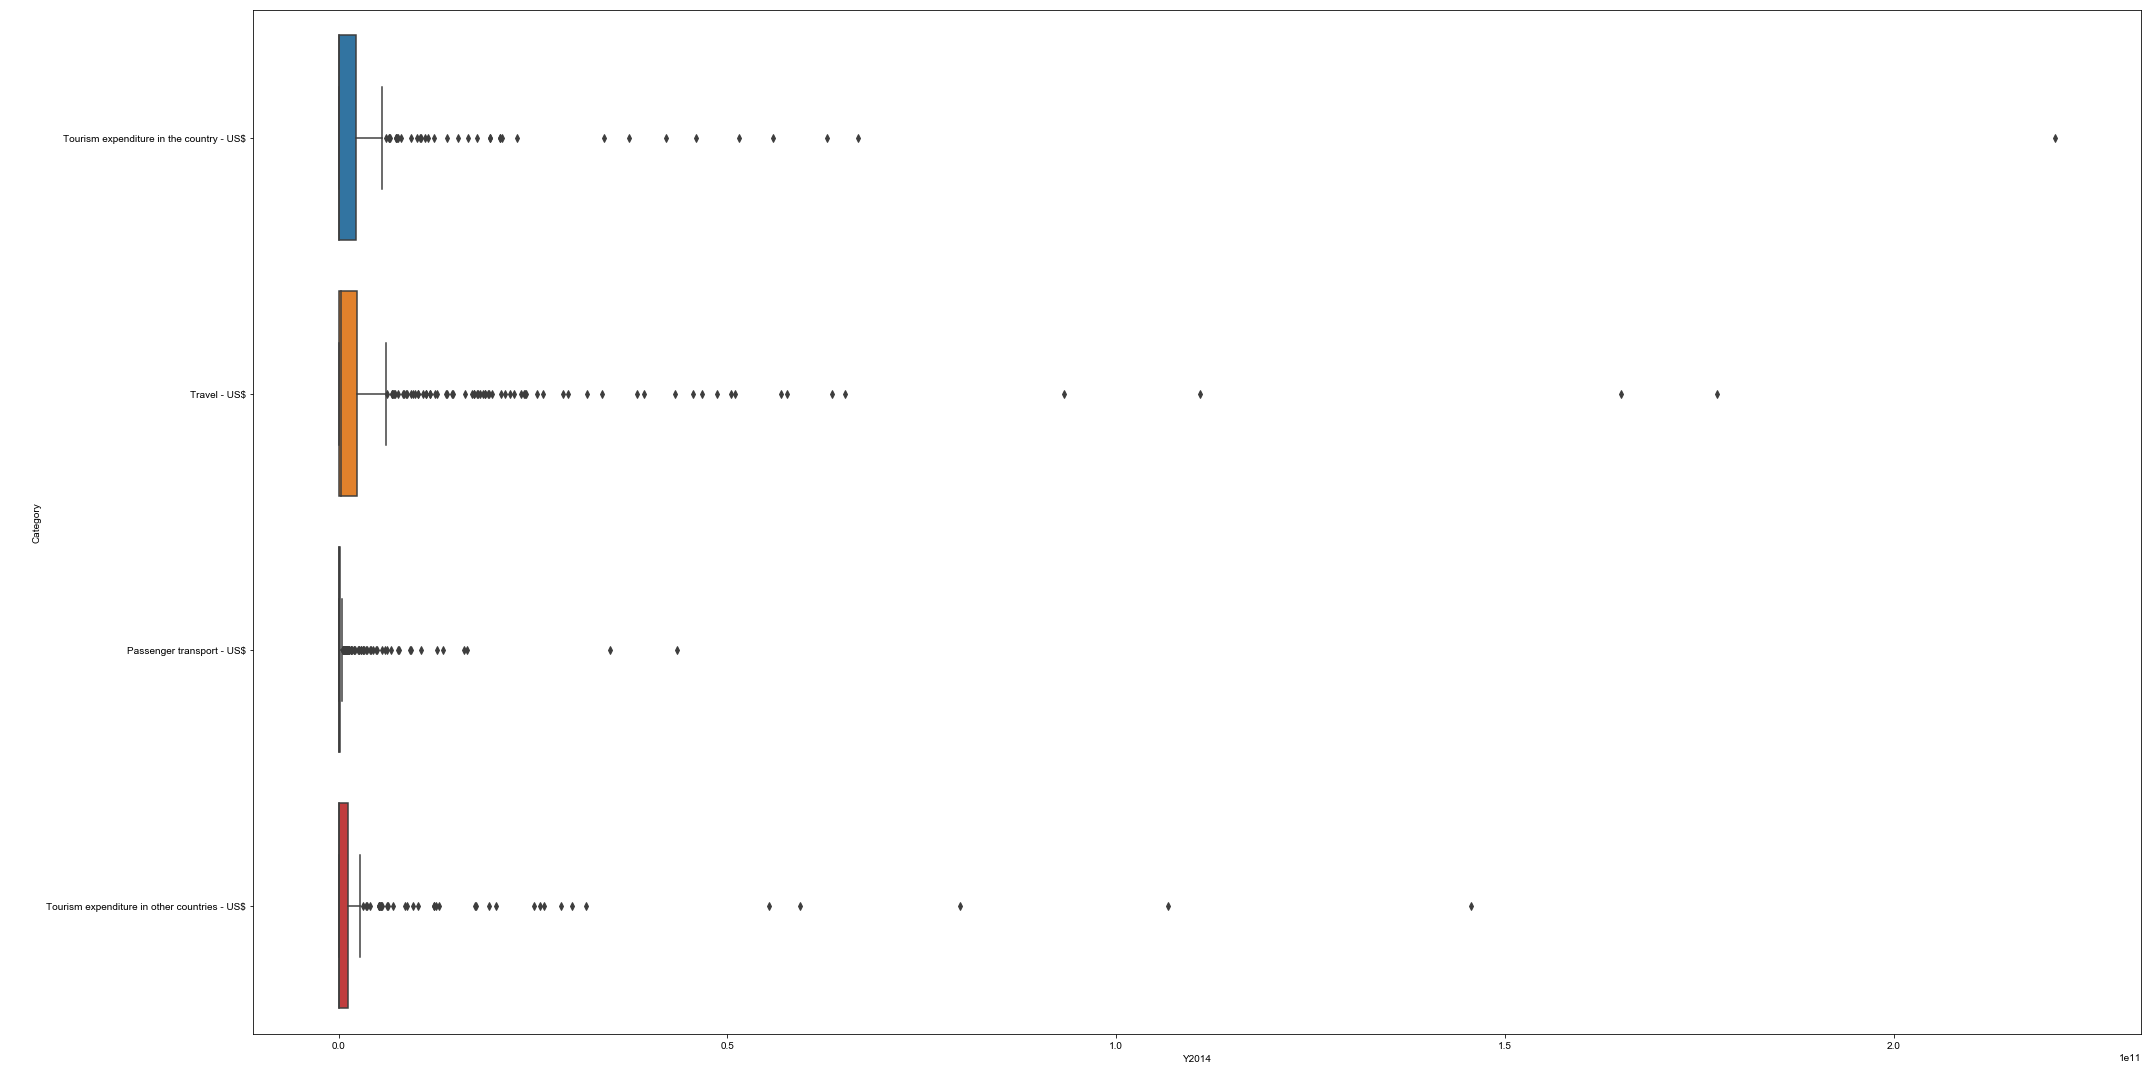

In [67]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Y2014', y='Category', data=analysis_data)
plt.tight_layout()
sns.set(font_scale=2.5)

In [68]:
#It seems like maximum amount of money is spent on tourism within countries and on travel.

In [69]:
revised_travel_data.head()

,Series,Country_name,Tourism_type,Y2014,Category
0,0,AFGHANISTAN,Inbound tourism,0.0,Arrivals
1,IMF,AFGHANISTAN,Inbound tourism,91000000.0,Tourism expenditure in the country - US$
2,IMF,AFGHANISTAN,Inbound tourism,82000000.0,Travel - US$
3,IMF,AFGHANISTAN,Inbound tourism,9000000.0,Passenger transport - US$
4,0,AFGHANISTAN,Outbound tourism,0.0,Departures


In [70]:
country_info= pd.read_excel('country_info.xlsx')

In [71]:
country_info.head()

,Country_name,Continent
0,ANDORRA,Europe
1,UNITED ARAB EMIRATES,Asia
2,AFGHANISTAN,Asia
3,ANTIGUA AND BARBUDA,North America
4,ANGUILLA,North America


In [72]:
final_tour_data= pd.merge(revised_travel_data,country_info, on='Country_name')

In [73]:
final_tour_data.head()

,Series,Country_name,Tourism_type,Y2014,Category,Continent
0,0,AFGHANISTAN,Inbound tourism,0.0,Arrivals,Asia
1,IMF,AFGHANISTAN,Inbound tourism,91000000.0,Tourism expenditure in the country - US$,Asia
2,IMF,AFGHANISTAN,Inbound tourism,82000000.0,Travel - US$,Asia
3,IMF,AFGHANISTAN,Inbound tourism,9000000.0,Passenger transport - US$,Asia
4,0,AFGHANISTAN,Outbound tourism,0.0,Departures,Asia


In [74]:
analysis_data1=final_tour_data.loc[final_tour_data['Category'].isin(['Arrivals','Departures']),:]

In [75]:
analysis_data1.head()

,Series,Country_name,Tourism_type,Y2014,Category,Continent
0,0,AFGHANISTAN,Inbound tourism,0.0,Arrivals,Asia
4,0,AFGHANISTAN,Outbound tourism,0.0,Departures,Asia
8,VF,ALBANIA,Inbound tourism,3673000.0,Arrivals,Europe
9,TF,ALBANIA,Inbound tourism,3341000.0,Arrivals,Europe
10,THS,ALBANIA,Inbound tourism,161000.0,Arrivals,Europe


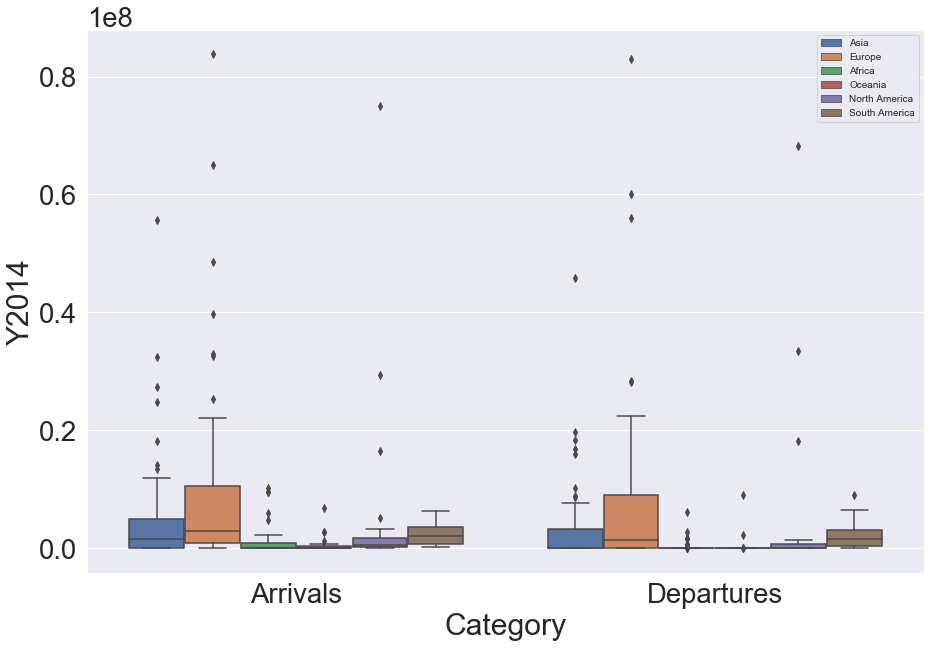

In [76]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Category', y='Y2014', hue='Continent', data=analysis_data1)
plt.legend(loc='upper right', fontsize=10)

In [77]:
#Seems like maximum number of people are traveling in and out from Europe, followed by Asia and then South America.

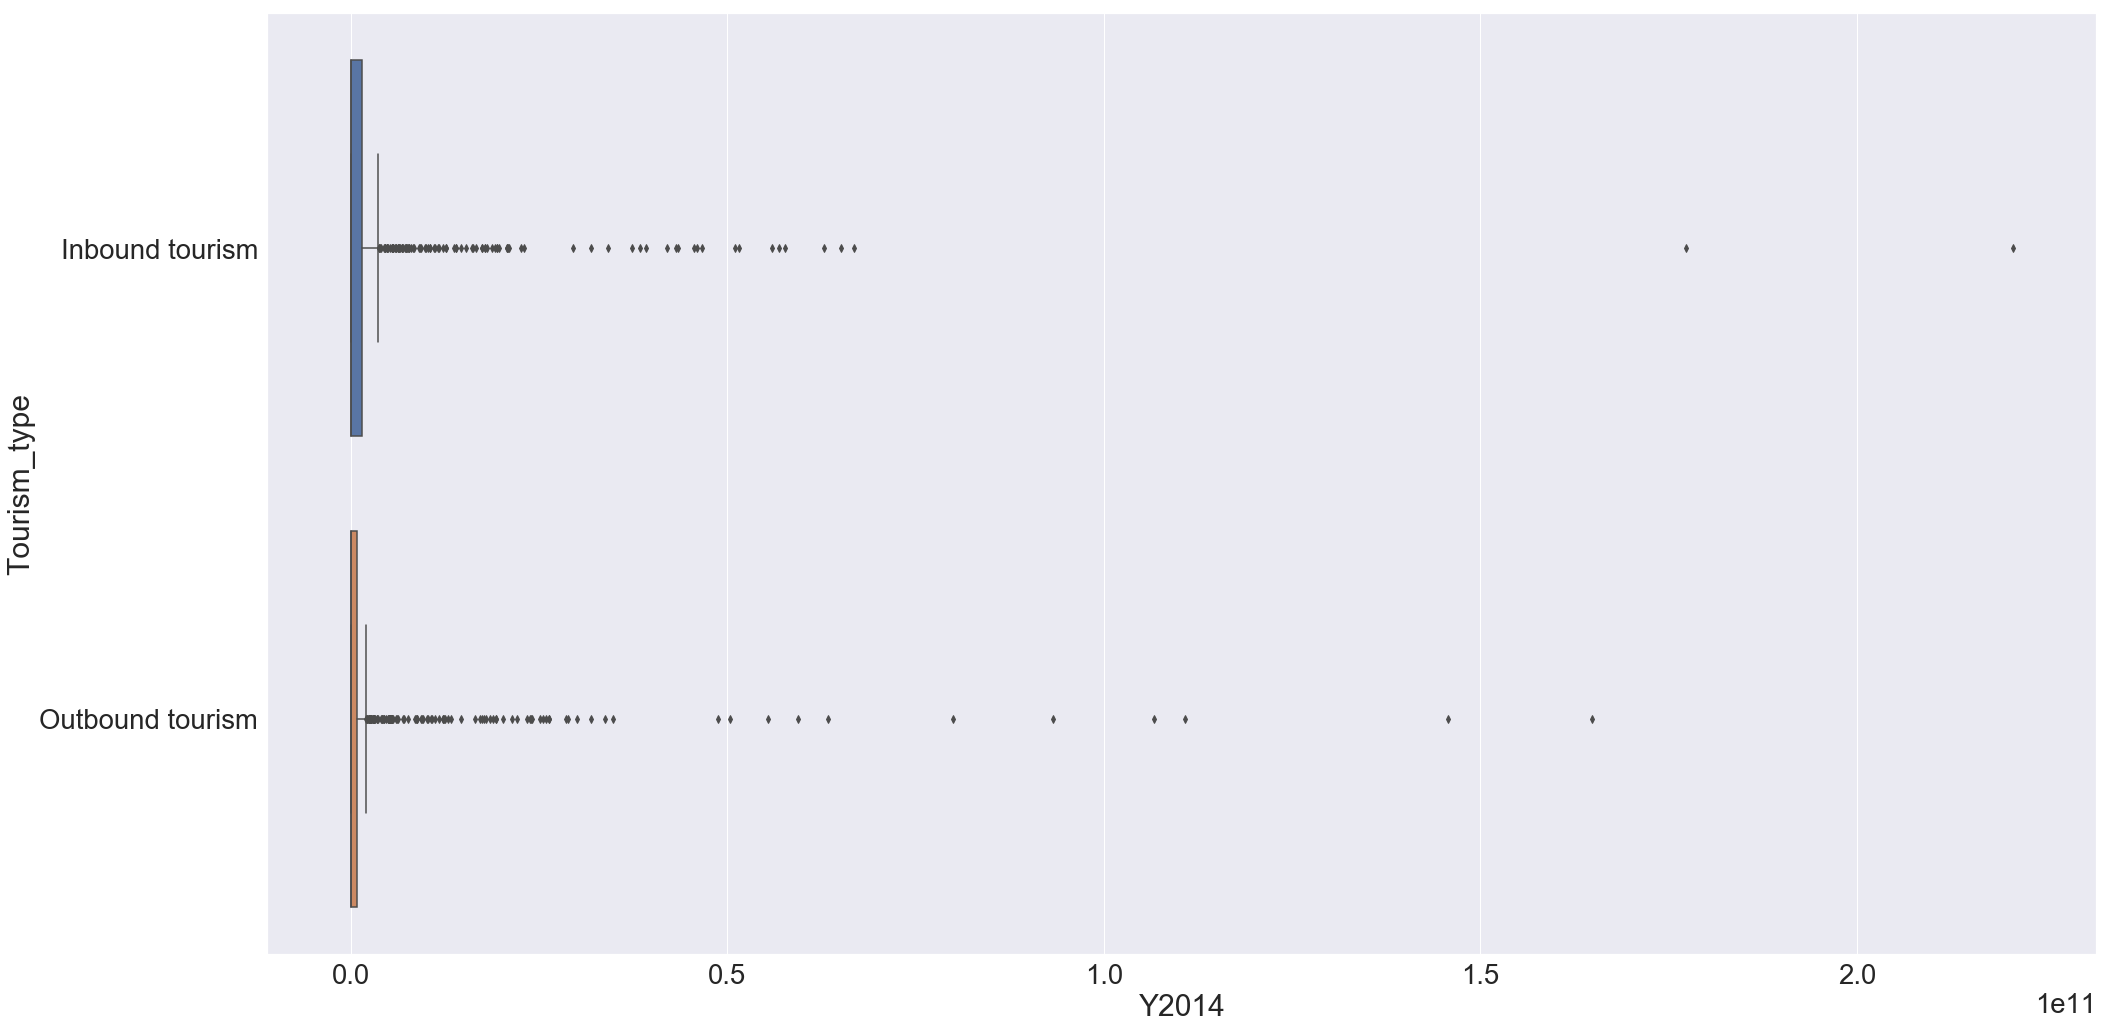

In [78]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Y2014', y='Tourism_type', data=analysis_data)
plt.tight_layout()
sns.set(font_scale=2.5)
#More amount spent on Inbound Tourism